In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
train_dir = "/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/train"
test_dir = "/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/test"

# Visualizing Image Augmentation

In [14]:
sample_generator = ImageDataGenerator(rescale=1./255, 
                                      horizontal_flip=True, 
                                      vertical_flip=True, 
                                      rotation_range=90, 
                                      height_shift_range=0.1, 
                                      width_shift_range=0.1, 
                                      zoom_range=0.15
                                     )

sample_images = sample_generator.flow_from_directory(
    train_dir,
    target_size = (300, 300),
    color_mode = 'rgb',
    class_mode = None,
    batch_size = 1,
    shuffle = True,
    seed = 42
)

Found 2520 images belonging to 3 classes.


In [15]:
next(sample_images)[0].shape

(300, 300, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

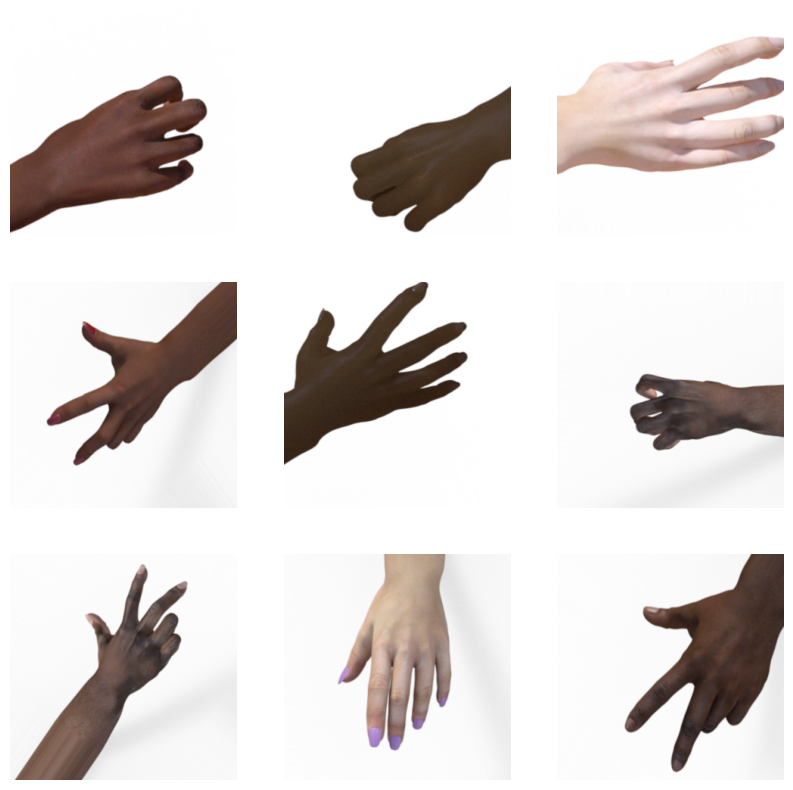

In [16]:
plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3, i + 1)
    img = next(sample_images)[0]
    plt.imshow(img)
    plt.axis('off')
    
plt.show

# Creating Generator

In [17]:
train_generator = ImageDataGenerator(rescale=1./255, 
                                      horizontal_flip=True, 
                                      vertical_flip=True, 
                                      rotation_range=90, 
                                      height_shift_range=0.1, 
                                      width_shift_range=0.1, 
                                      zoom_range=0.15
                                     )


test_generator = ImageDataGenerator(rescale=1./255, 
                                      validation_split=0.7)

In [18]:
train_images = train_generator.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = True,
    seed = 42
)


# dari test_generator validation_split yang 0.7 nya
val_images = test_generator.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = True,
    seed = 42,
    subset='training'
)


# dari test_generator validation_split yang 0.3 nya
test_images = test_generator.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = False,
    seed = 42,
    subset='validation'
)

Found 2520 images belonging to 3 classes.
Found 114 images belonging to 3 classes.
Found 258 images belonging to 3 classes.


# Training

In [19]:
inputs = tf.keras.Input(shape=(150,150,3))
x = tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1730252737.196088     257 service.cc:145] XLA service 0x7cc174008730 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730252737.196159     257 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 2/79 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.3750 - loss: 55.3836 

I0000 00:00:1730252742.801114     257 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


79/79 ━━━━━━━━━━━━━━━━━━━━ 48s 474ms/step - accuracy: 0.3656 - loss: 22.4634 - val_accuracy: 0.3772 - val_loss: 1.0184
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 288ms/step - accuracy: 0.5662 - loss: 0.9030 - val_accuracy: 0.7719 - val_loss: 0.5684
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 268ms/step - accuracy: 0.6655 - loss: 0.7223 - val_accuracy: 0.6754 - val_loss: 0.6223
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 287ms/step - accuracy: 0.6934 - loss: 0.6729 - val_accuracy: 0.8246 - val_loss: 0.4678
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 262ms/step - accuracy: 0.7144 - loss: 0.6373 - val_accuracy: 0.7895 - val_loss: 0.5147
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 291ms/step - accuracy: 0.7421 - loss: 0.6048 - val_accuracy: 0.8070 - val_loss: 0.4097
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 265ms/step - accuracy: 0.7548 - loss: 0.6079 - val_accuracy: 0.7193 - val_loss: 0.5408
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 291ms/step - accuracy: 0.7602 - loss: 0.5887 - val_accurac

# Result

In [20]:
predictions = model.predict(test_images)

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 320ms/step


In [21]:
np.argmax(predictions, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2])

In [22]:
predictions = np.argmax(model.predict(test_images), axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step


In [23]:
test_images.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [24]:
cm = confusion_matrix(test_images.labels, predictions, labels=[0,1,2])
clr = classification_report(test_images.labels, predictions, labels=[0,1,2], target_names=['Paper', 'Rock', 'Scissors'])

Accuracy: 93.41%


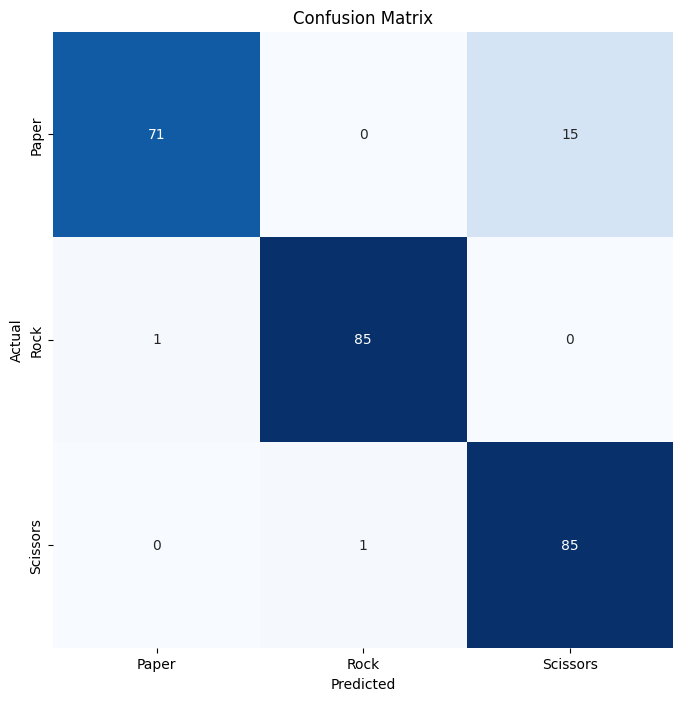

Classification Report:
----------------------
               precision    recall  f1-score   support

       Paper       0.99      0.83      0.90        86
        Rock       0.99      0.99      0.99        86
    Scissors       0.85      0.99      0.91        86

    accuracy                           0.93       258
   macro avg       0.94      0.93      0.93       258
weighted avg       0.94      0.93      0.93       258



In [25]:
acc = model.evaluate(test_images, verbose=0)[1]
print("Accuracy: {:.2f}%".format(acc * 100))

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['Paper', 'Rock', 'Scissors'])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['Paper', 'Rock', 'Scissors'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n----------------------\n", clr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


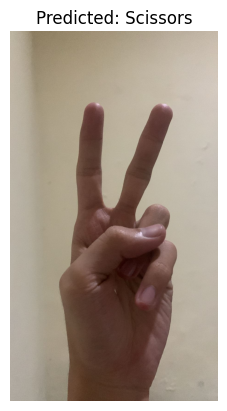

The model predicts this image as: Scissors


In [41]:
from tensorflow.keras.preprocessing import image

# Load and preprocess the new image
img_path = '/kaggle/input/guntingimg/WhatsApp Image 2024-10-24 at 22.03.01_8d3cda82.jpg'  # Path to the new image
img = image.load_img(img_path, target_size=(150, 150))  # Resize the image to (150, 150)
img_array = image.img_to_array(img)  # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Rescale to match the training data

# Predict the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]

# Define class names based on your model's training
class_names = ['Paper', 'Rock', 'Scissors']
predicted_label = class_names[predicted_class]

# Display the image with prediction
plt.imshow(image.load_img(img_path))  # Load and display the image
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')  # Hide axis
plt.show()

print(f"The model predicts this image as: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


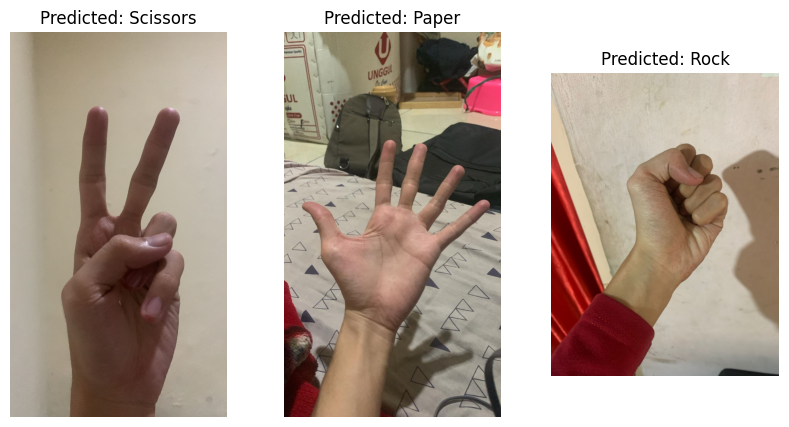

Image 1 (/kaggle/input/guntingimg/WhatsApp Image 2024-10-24 at 22.03.01_8d3cda82.jpg) predicted as: Scissors
Image 2 (/kaggle/input/paperimg/WhatsApp Image 2024-10-24 at 21.55.37_fe078091.jpg) predicted as: Paper
Image 3 (/kaggle/input/rocksimgs/WhatsApp Image 2024-10-30 at 09.24.34_6077911d.jpg) predicted as: Rock


In [46]:
# Define paths to the images
img_paths = [
    '/kaggle/input/guntingimg/WhatsApp Image 2024-10-24 at 22.03.01_8d3cda82.jpg',
    '/kaggle/input/paperimg/WhatsApp Image 2024-10-24 at 21.55.37_fe078091.jpg',
    '/kaggle/input/rocksimgs/WhatsApp Image 2024-10-30 at 09.24.34_6077911d.jpg'
]

# Preprocess the images
img_arrays = []
for img_path in img_paths:
    img = image.load_img(img_path, target_size=(150, 150))  # Resize the image
    img_array = image.img_to_array(img)  # Convert to array
    img_array /= 255.0  # Rescale to match the training data
    img_arrays.append(img_array)

# Stack images into a batch
img_batch = np.stack(img_arrays, axis=0)

# Predict the classes
predictions = model.predict(img_batch)
predicted_classes = np.argmax(predictions, axis=1)

# Define class names based on your model's training
class_names = ['Paper', 'Rock', 'Scissors']

# Display each image with its prediction
plt.figure(figsize=(10, 5))
for i, img_path in enumerate(img_paths):
    plt.subplot(1, 3, i + 1)
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f"Predicted: {class_names[predicted_classes[i]]}")
    plt.axis('off')  # Hide axis

plt.show()

# Print predictions
for i, predicted_class in enumerate(predicted_classes):
    print(f"Image {i+1} ({img_paths[i]}) predicted as: {class_names[predicted_class]}")
